Final Project: The Game of Life
Objective: Implement using NumPy and matplotlib a custom version of the Game of Life where users can provide their own update rules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

Task 1

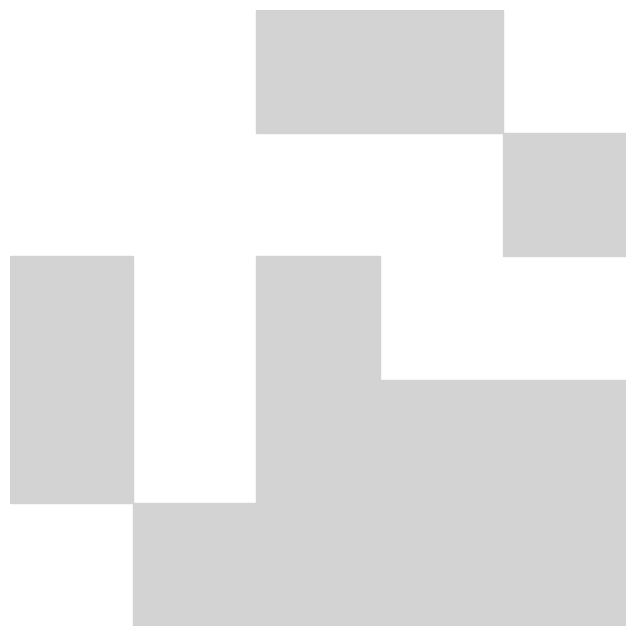

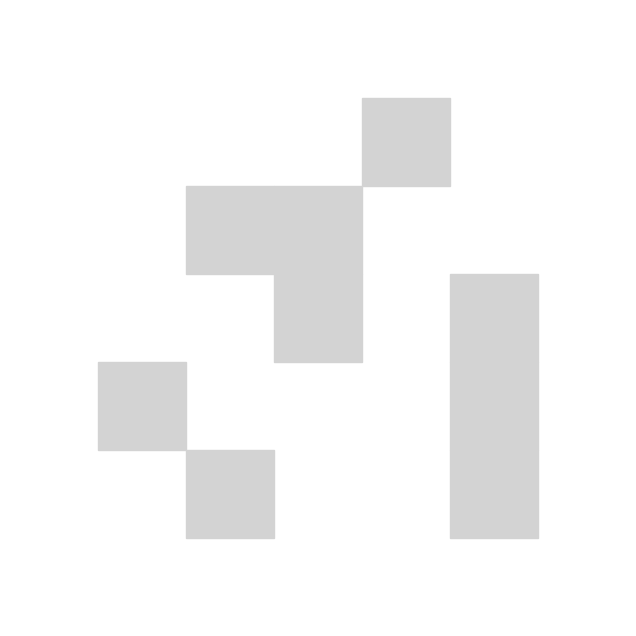

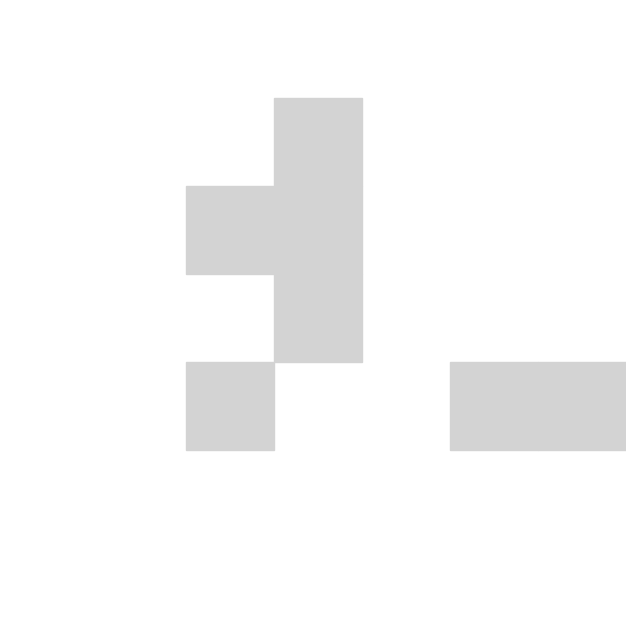

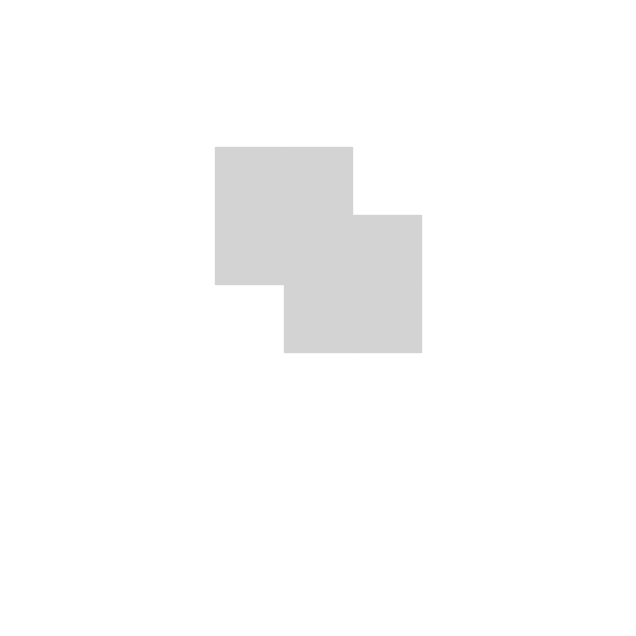

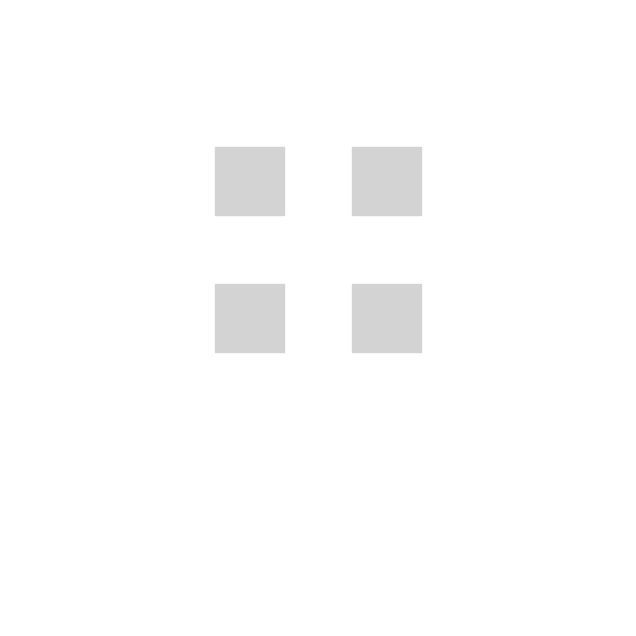

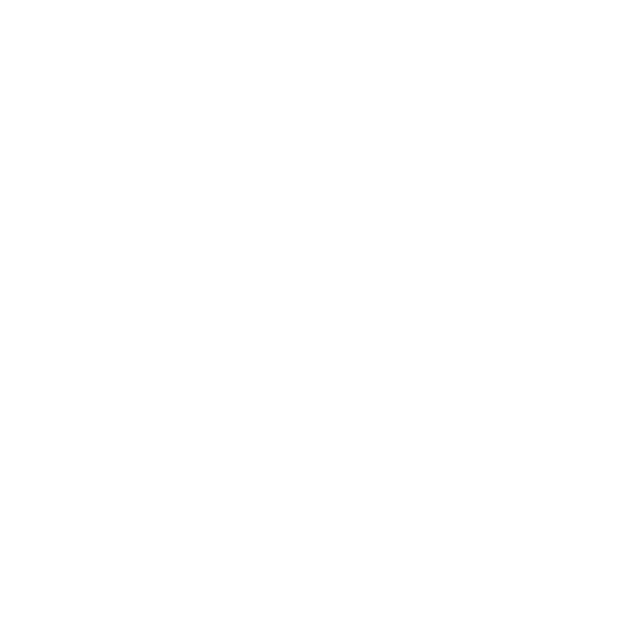

In [18]:
import numpy as np
import matplotlib.pyplot as plt


# Task 1.1: Draw cell background
def draw_cell_background(x, y):
    plt.fill([x - 0.5, x - 0.5, x + 0.5, x + 0.5],
             [y - 0.5, y + 0.5, y + 0.5, y - 0.5],
             color='lightgray')
    
# Task 1.1: Initialize life state
def init_life_state_1(n, m, p):
    """
    Generate an initial random subset of life cells (2D points).
    """
    if not (0 <= p <= 1):
        raise ValueError("Probability p must be between 0 and 1.")
    return np.random.choice([0, 1], size=(n, m), p=[1 - p, p])


# Task 1.2: Update life state (Expand if Alive Cell on Border)
def update_life_state_1(life_state):
    """
    For each cell evaluate the update rules specified above to obtain its new state.
    Expands the grid size only if an alive cell is directly on the border.
    """
    n, m = life_state.shape
    out_life_state = np.zeros_like(life_state)

    # Pad the grid with a boundary of dead cells
    padded_state = np.pad(life_state, pad_width=1, mode='constant', constant_values=0)

    # Calculate the number of neighbors for each cell
    neighbors = (
        padded_state[:-2, :-2] + padded_state[:-2, 1:-1] + padded_state[:-2, 2:] +
        padded_state[1:-1, :-2] +                      0 + padded_state[1:-1, 2:] +
        padded_state[2:, :-2] + padded_state[2:, 1:-1] + padded_state[2:, 2:]
    )

    # Apply Conway's Game of Life rules
    out_life_state[(life_state == 1) & ((neighbors == 2) | (neighbors == 3))] = 1
    out_life_state[(life_state == 0) & (neighbors == 3)] = 1

    # Check if an alive cell is on the border
    top_row, bottom_row = life_state[0, :], life_state[-1, :]
    left_col, right_col = life_state[:, 0], life_state[:, -1]

    if np.any(top_row) or np.any(bottom_row) or np.any(left_col) or np.any(right_col):
        # Expand the grid if any live cells are directly on the borders
        out_life_state = np.pad(out_life_state, pad_width=1, mode='constant', constant_values=0)

    return out_life_state

# Task 1.3: Draw life state
def draw_life_state_1(life_state):
    """
    Display the 2D positions of the selected collection of cells (2D points).
    """
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.gca().set_aspect('equal', adjustable='box')
    rows, cols = np.where(life_state == 1)
    for x, y in zip(rows, cols):
        draw_cell_background(y, x)  # Corrected for plotting orientation
    plt.xlim(-0.5, life_state.shape[1] - 0.5)
    plt.ylim(-0.5, life_state.shape[0] - 0.5)
    plt.gca().invert_yaxis()  # Align visual grid with array indices
    plt.show()
    
    
# Task 1.4: Play Game of Life with fixed rules
def play_game_of_life_1():
    """
    Play the Game of Life with fixed rules and dynamic grid expansion.
    """
    n = int(input("Enter # of rows in initial grid (ex: 20): "))
    m = int(input("Enter # of columns in initial grid (ex: 20): "))
    p = float(input("Enter probability of a cell being alive (0.0 to 1.0, ex: 0.2): "))

    life_state = init_life_state_1(n, m, p)
    draw_life_state_1(life_state)

    while True:
        iterations = int(input("Enter number of iterations to update (ex: 10): "))
        for _ in range(iterations):
            life_state = update_life_state_1(life_state)
            draw_life_state_1(life_state)

        cont = input("Do you want to perform more iterations? (input yes/no): ").lower()
        if cont != 'yes':
            save = input("Do you want to save the initial and final states of the grid? (input yes/no): ").lower()
            if save == 'yes':
                np.savetxt('initial_state.csv', init_life_state_1(n, m, p), delimiter=',', fmt='%d')
                np.savetxt('final_state.csv', life_state, delimiter=',', fmt='%d')
            break

#Main Method
if __name__ == "__main__":
    play_game_of_life_1()

Task 2

Welcome to the Game of Life (Custom Rules)


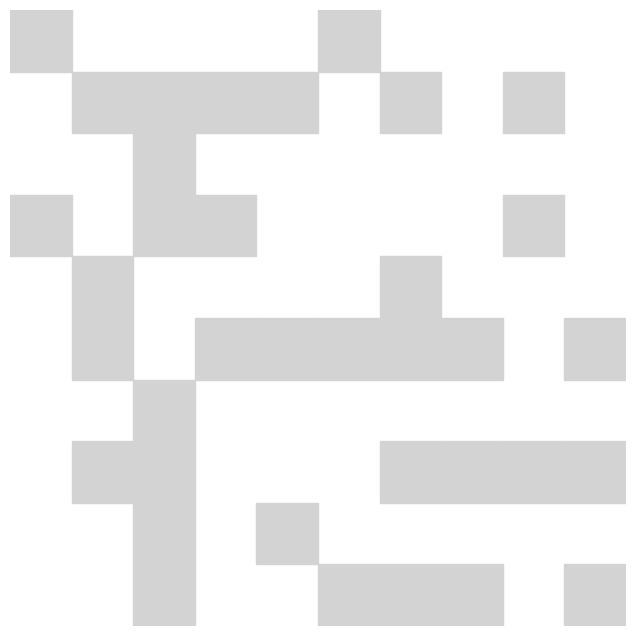

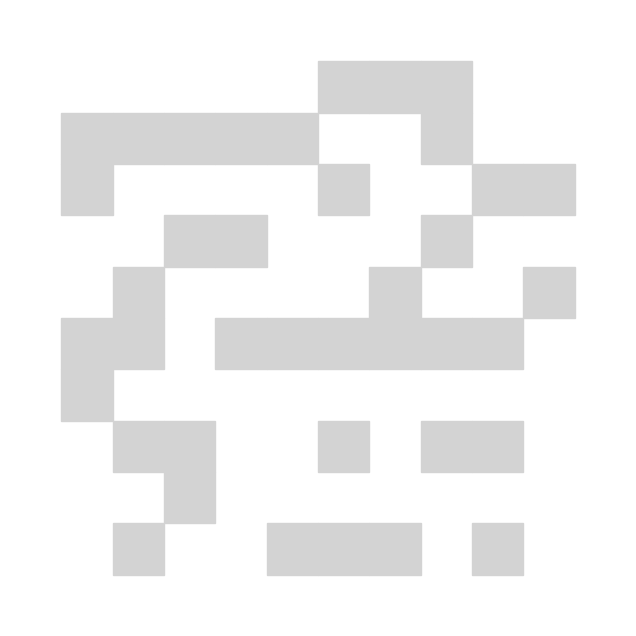

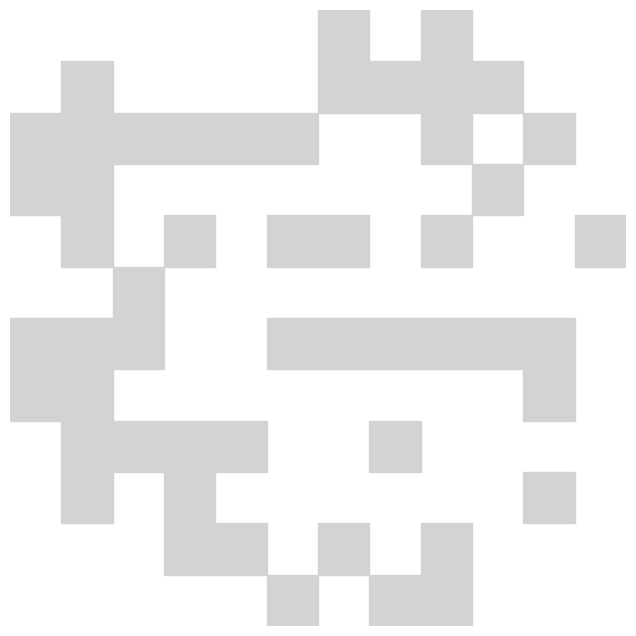

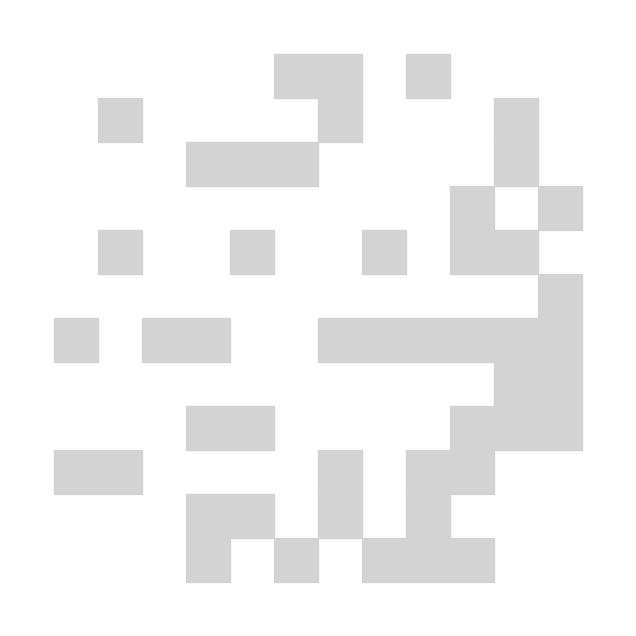

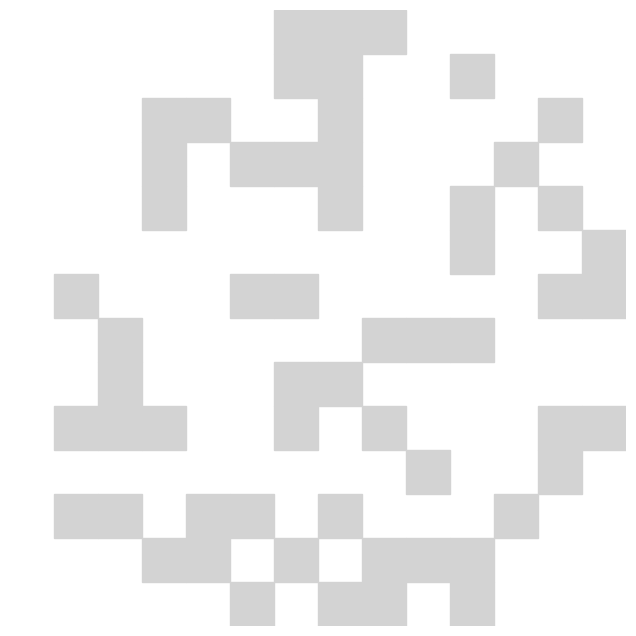

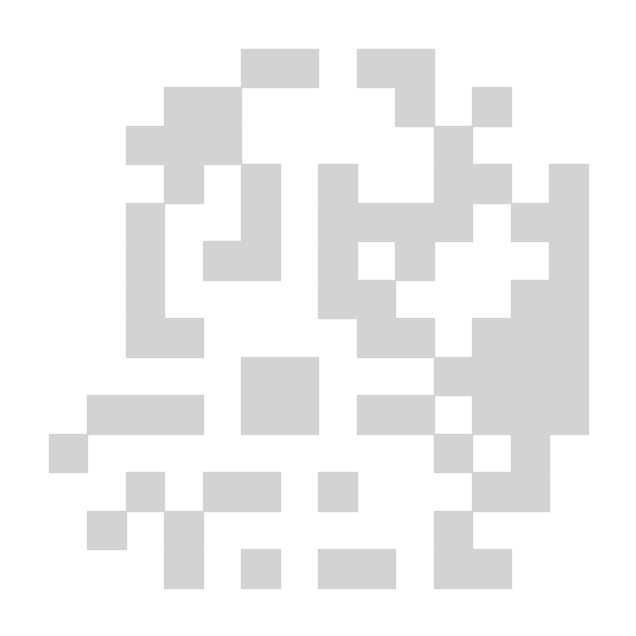

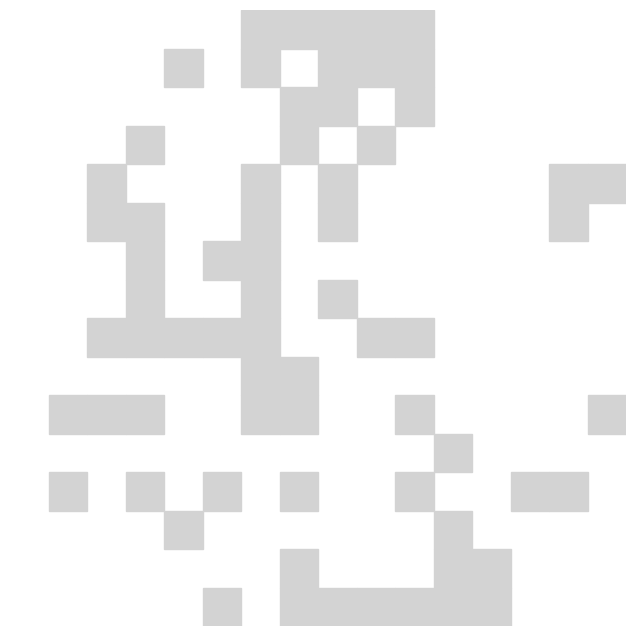

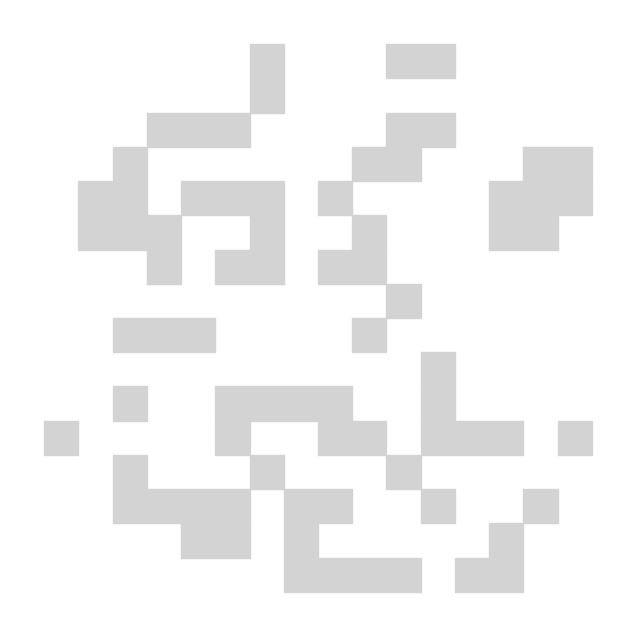

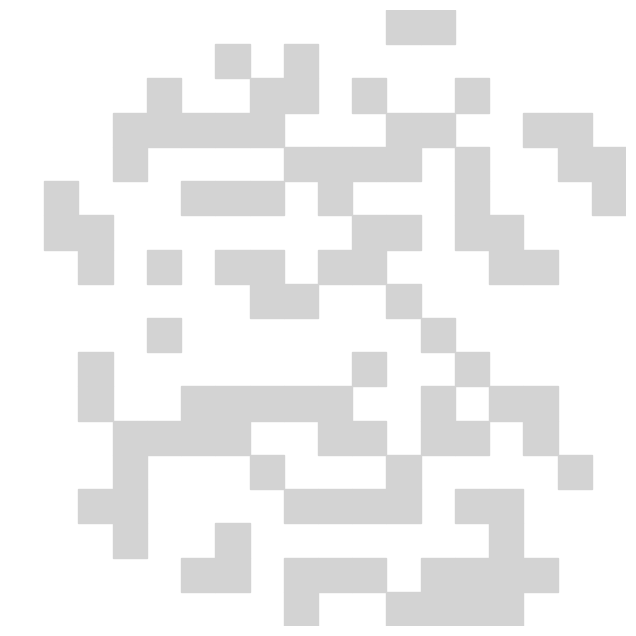

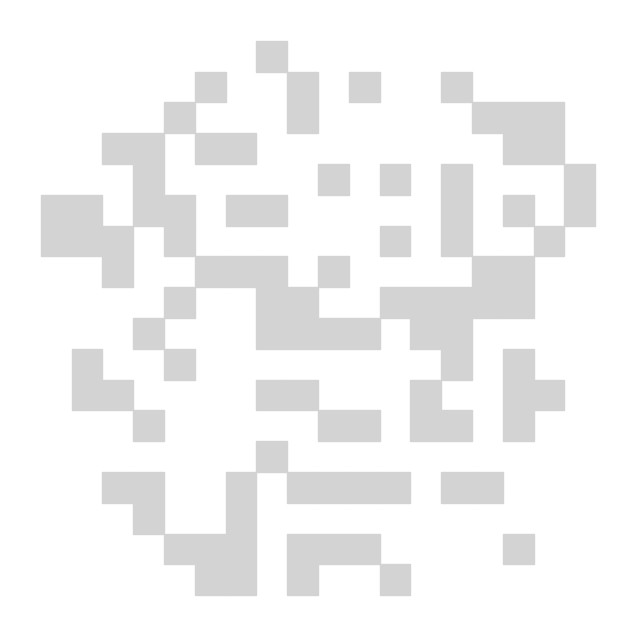

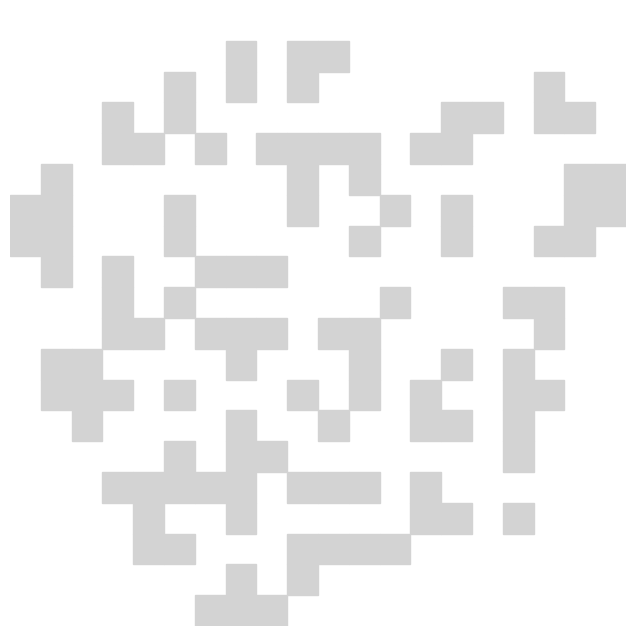

Initial state, final state, and rules saved successfully.
Exiting the program. Goodbye!


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Task 2.1: Initialize life state (same as Task 1.1)
def init_life_state_2(n, m, p):
    """
    Generate an initial random subset of life cells (2D points).
    """
    return init_life_state_1(n, m, p)

# Task 2.2: Update life state with custom rules and border-based expansion
def update_life_state_2(life_state, b1=3, b2=3, d1=2, d2=3):
    """
    Update life state based on user-specified rules.
    Expands the grid if a live cell is directly on the border.
    """
    n, m = life_state.shape
    out_life_state = np.zeros_like(life_state)

    # Pad the grid with a boundary of dead cells
    padded_state = np.pad(life_state, pad_width=1, mode='constant', constant_values=0)

    # Calculate the number of neighbors for each cell
    neighbors = (
        padded_state[:-2, :-2] + padded_state[:-2, 1:-1] + padded_state[:-2, 2:] +
        padded_state[1:-1, :-2] +                      0 + padded_state[1:-1, 2:] +
        padded_state[2:, :-2] + padded_state[2:, 1:-1] + padded_state[2:, 2:]
    )

    # Apply custom rules
    out_life_state[(life_state == 1) & ((neighbors >= d1) & (neighbors <= d2))] = 1
    out_life_state[(life_state == 0) & ((neighbors >= b1) & (neighbors <= b2))] = 1

    # Check if an alive cell is directly on the border
    top_row, bottom_row = life_state[0, :], life_state[-1, :]
    left_col, right_col = life_state[:, 0], life_state[:, -1]

    if np.any(top_row) or np.any(bottom_row) or np.any(left_col) or np.any(right_col):
        # Expand the grid if any live cells are directly on the borders
        out_life_state = np.pad(out_life_state, pad_width=1, mode='constant', constant_values=0)

    return out_life_state

# Task 2.3: Draw life state with custom rules (similar to Task 1.3)
def draw_life_state_2(life_state):
    """
    Display the 2D positions of the selected collection of cells (2D points).
    """
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.gca().set_aspect('equal', adjustable='box')
    rows, cols = np.where(life_state == 1)
    for x, y in zip(rows, cols):
        draw_cell_background(y, x)  # Corrected for plotting orientation
    plt.xlim(-0.5, life_state.shape[1] - 0.5)
    plt.ylim(-0.5, life_state.shape[0] - 0.5)
    plt.gca().invert_yaxis()  # Align visual grid with array indices
    plt.show()
    
# Task 2.4: Play Game of Life with custom rules and dynamic grid expansion
def play_game_of_life_2():
    """
    Play the Game of Life with custom rules and dynamic grid expansion.
    """
    print("Welcome to the Game of Life (Custom Rules)")

    # User Input for Grid Initialization
    n = int(input("Enter # of rows in initial grid (ex: 20): "))
    m = int(input("Enter # of columns in initial grid (ex: 20): "))
    p = float(input("Enter probability of a cell being alive (0.0 to 1.0, ex: 0.2): "))

    # User Input for Rules
    b1 = int(input("Enter b1 (if a dead cell has at least b1 neighbors and at most b2 neighbors, then it becomes alive, ex: 3): "))
    b2 = int(input("Enter b2 (if a dead cell has at least b1 neighbors and at most b2 neighbors, then it becomes alive, ex: 3): "))
    d1 = int(input("Enter d1 (if an alive cell has at least d1 neighbors and at most d2 neighbors, then it stays alive, ex: 2): "))
    d2 = int(input("Enter d1 (if an alive cell has at least d1 neighbors and at most d2 neighbors, then it stays alive, ex: 2): "))

    # Initialize life state
    life_state = init_life_state_2(n, m, p)
    draw_life_state_2(life_state)

    while True:
        # User Input for Number of Iterations
        iterations = int(input("Enter number of iterations to update (ex: 10): "))
        for _ in range(iterations):
            life_state = update_life_state_2(life_state, b1, b2, d1, d2)
            draw_life_state_2(life_state)

        # Continue or Save and Exit
        cont = input("Do you want to perform more iterations? (input yes/no): ").lower()
        if cont != 'yes':
            save = input("Do you want to save the initial and final states of the grid? (input yes/no): ").lower()
            if save == 'yes':
                np.savetxt('initial_state_custom.csv', init_life_state_2(n, m, p), delimiter=',', fmt='%d')
                np.savetxt('final_state_custom.csv', life_state, delimiter=',', fmt='%d')
                with open('rules.json', 'w') as f:
                    json.dump({"b1": b1, "b2": b2, "d1": d1, "d2": d2}, f)
                print("Initial state, final state, and rules saved successfully.")
            print("Exiting the program. Goodbye!")
            break

# Main Method
if __name__ == "__main__":
    play_game_of_life_2()

Task 3

Welcome to the Game of Life (Non-Binary States)
Initial state generated.
Initial State:


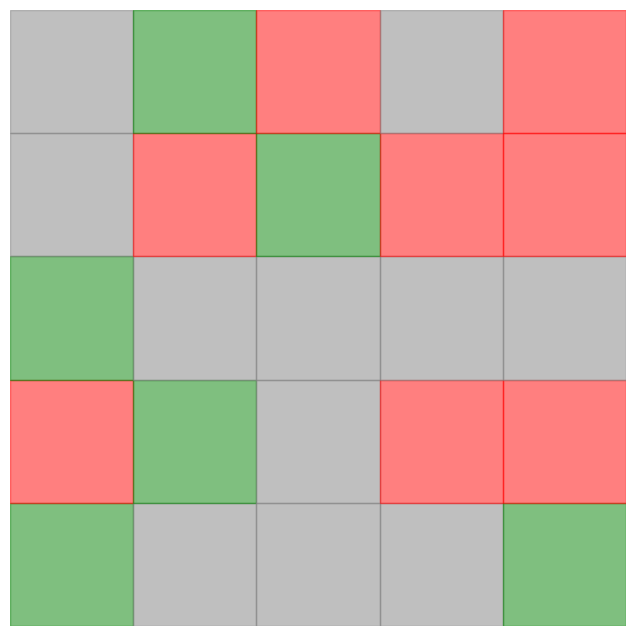

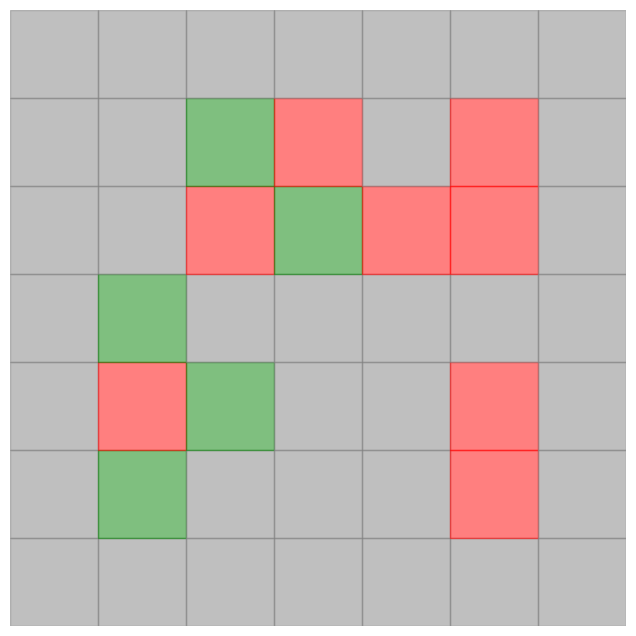

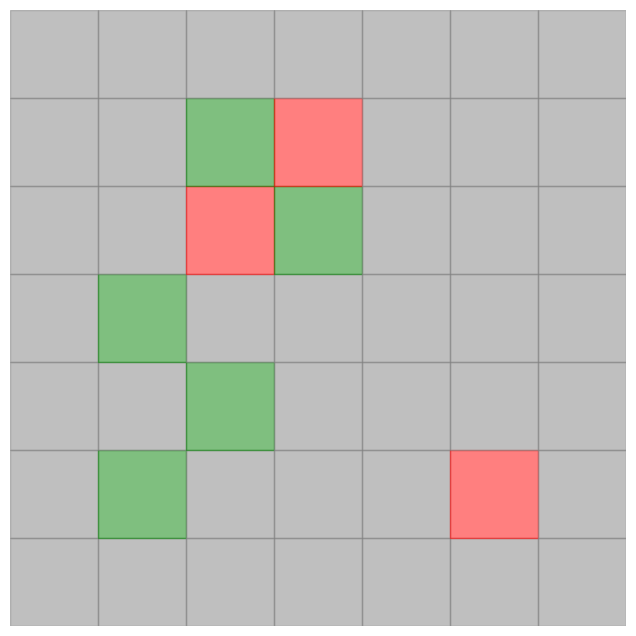

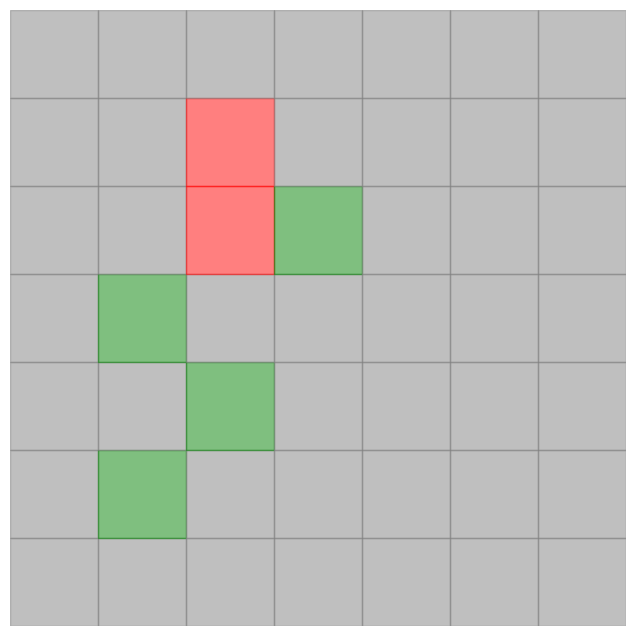

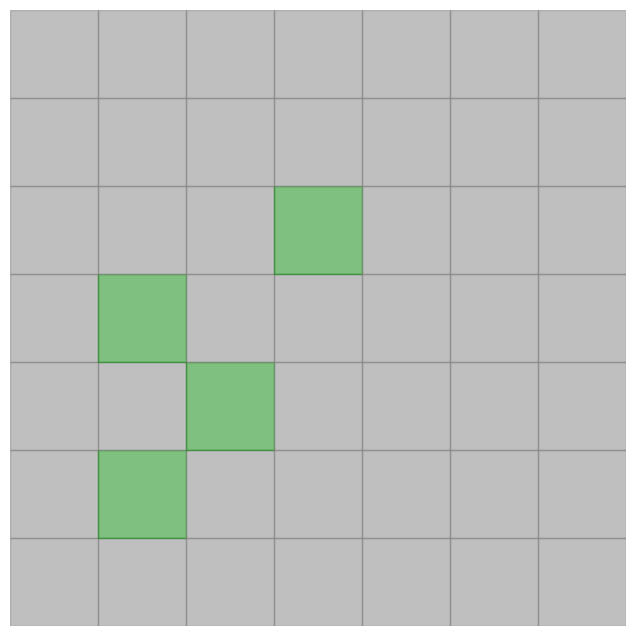

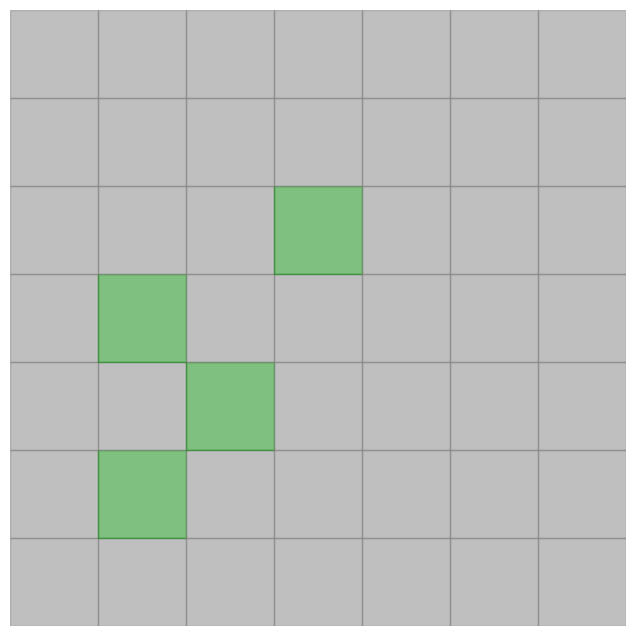

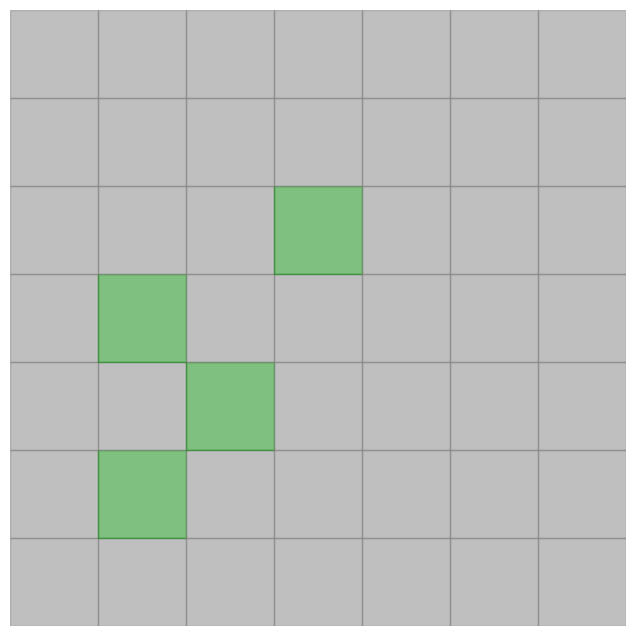

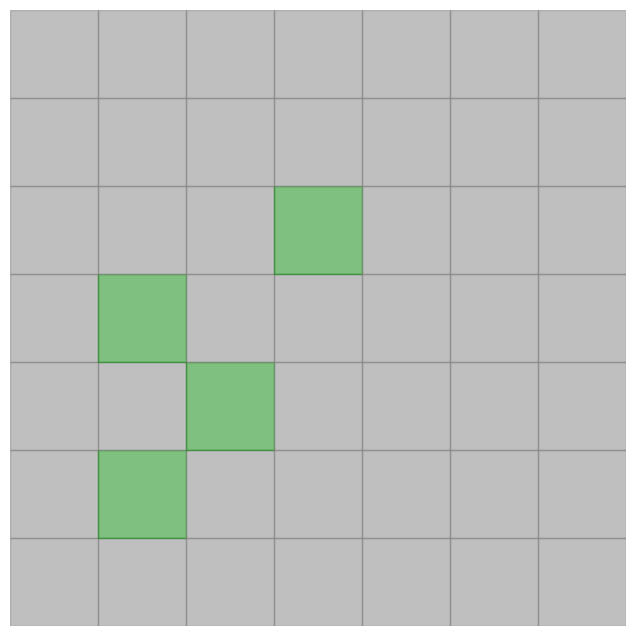

Initial state, final state, and rules saved.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import json


# Task 3.1: Draw Life State
def draw_cell_background(x, y, color):
    """
    Draw a single cell with the specified color.
    """
    plt.fill([x - 0.5, x - 0.5, x + 0.5, x + 0.5], [y - 0.5, y + 0.5, y + 0.5, y - 0.5], color=color, alpha=0.5)
    
# Task 3.1: Initialize Life State
def init_life_state_3(n, m, p_list, states):
    """
    Generate an initial random subset of non-binary cells.
    IN: n, int, number of rows
        m, int, number of columns
        p_list, list of float, probabilities for each state
        states, list of int, possible states of the cells
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    return np.random.choice(states, size=(n, m), p=p_list)


# Task 3.2: Update Life State
def update_life_state_3(life_state, rules_dict):
    """
    Update the life state according to specified rules and expand the grid if needed.
    IN: life_state, ndarray of shape (n, m), current state of the cells
        rules_dict, dict, rules for updating the cells
    OUT: ndarray of shape (n, m), updated state of the cells
    """
    life_state = expand_grid_if_needed(life_state)

    n, m = life_state.shape
    out_life_state = np.zeros_like(life_state)

    for x in range(n):
        for y in range(m):
            current_state = life_state[x, y]
            rule_set = rules_dict.get(str(current_state), [])
            new_state = current_state  # Default: retain current state
            for rule in rule_set:
                if "neighbor_to" in rule:
                    neighbors = life_state[max(0, x - 1):min(n, x + 2), max(0, y - 1):min(m, y + 2)]
                    neighbor_type = rule["neighbor_to"]["if"][0]["type"]
                    at_least = rule["neighbor_to"]["if"][0]["at_least"]
                    at_most = rule["neighbor_to"]["if"][0]["at_most"]
                    count = np.sum(neighbors == neighbor_type)
                    if at_least <= count <= at_most:
                        prob_rules = rule["neighbor_to"]["then"]["probability"]
                        rnd = np.random.random()
                        cumulative = 0
                        for pr in prob_rules:
                            cumulative += pr["value"]
                            if rnd <= cumulative:
                                new_state = pr["then"]["turn_to"]
                                break
                elif "probability" in rule:
                    prob_rules = rule["probability"]
                    rnd = np.random.random()
                    cumulative = 0
                    for pr in prob_rules:
                        cumulative += pr["value"]
                        if rnd <= cumulative:
                            new_state = pr["then"]["turn_to"]
                            break
            out_life_state[x, y] = new_state
    return out_life_state

# Task 3.2: Expand Grid Dynamically (helper method)
def expand_grid_if_needed(life_state):
    """
    Expands the grid if there is an alive cell (non-zero) on the border.
    IN: life_state, ndarray of shape (n, m), current state of the cells
    OUT: ndarray of shape (n+2, m+2) if expansion is needed, else same shape as input
    """
    top_row = life_state[0, :]
    bottom_row = life_state[-1, :]
    left_col = life_state[:, 0]
    right_col = life_state[:, -1]

    needs_expansion = any(top_row > 0) or any(bottom_row > 0) or any(left_col > 0) or any(right_col > 0)

    if needs_expansion:
        new_state = np.zeros((life_state.shape[0] + 2, life_state.shape[1] + 2), dtype=int)
        new_state[1:-1, 1:-1] = life_state
        return new_state
    return life_state

#Task 3.3: Draw life state
def draw_life_state_3(life_state, colors):
    """
    Display the 2D positions of the selected collection of cells.
    IN: life_state, ndarray of shape (n, m), current state of the cells
        colors, list of str, colors corresponding to each state
    OUT: None
    """
    plt.figure(figsize=(8, 8))
    for x in range(life_state.shape[0]):
        for y in range(life_state.shape[1]):
            state = life_state[x, y]
            draw_cell_background(x, y, colors[state])
    plt.xlim(-0.5, life_state.shape[0] - 0.5)
    plt.ylim(-0.5, life_state.shape[1] - 0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.show()
    
# Task 3.4: Play Game of Life
def play_game_of_life_3():
    """
    Play the Game of Life with non-binary states and dynamic grid expansion.
    Allows user input for all configurations and runs interactively.
    """
    print("Welcome to the Game of Life (Non-Binary States)")

    # User Input for Grid and State Initialization
    n = int(input("Enter # of rows in initial grid (ex: 20): "))
    m = int(input("Enter # of columns in initial grid (ex: 20): "))
    states = list(map(int, input("Enter possible cell states (seperate each state by a ',', ex: 0,1,2): ").split(',')))
    p_list = list(map(float, input("Enter probabilities for each state (seperate each probability by a ',', inputs must sum to 1, ex: 0.5,0.3,0.2): ").split(',')))

    # Validate probabilities
    if len(p_list) != len(states):
        print("Error: Length mismatch between probabilities and states.")
        return
    if not np.isclose(sum(p_list), 1.0):
        print("Error: Probabilities do not sum to 1.")
        return

    # Define default colors
    default_colors = ['gray', 'green', 'red', 'blue', 'yellow', 'purple', 'orange']
    colors = default_colors[:len(states)]

    # Initialize Life State
    life_state = init_life_state_3(n, m, p_list, states)
    print("Initial state generated.")

    # Load Rules from JSON File
    rules_file = input("Enter the path to the JSON file with rules: ")
    try:
        with open(rules_file, 'r') as f:
            rules_dict = json.load(f)
    except FileNotFoundError:
        print(f"Error: File not found at {rules_file}.")
        return
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {rules_file}.")
        return

    # Display the Initial State
    print("Initial State:")
    draw_life_state_3(life_state, colors)

    current_state = life_state.copy()
    while True:
        # Update State Iteratively
        iterations = int(input("Enter number of iterations to update (ex: 10): "))
        for _ in range(iterations):
            current_state = update_life_state_3(current_state, rules_dict)
            draw_life_state_3(current_state, colors)

        # Continue or Exit
        cont = input("Do you want to perform more iterations? (input yes/no): ").lower()
        if cont != 'yes':
            break

    # Save States and Rules
    save = input("Do you want to save the initial and final states of the grid? (input yes/no): ").lower()
    if save == 'yes':
        np.savetxt("initial_state_non_binary.csv", life_state, delimiter=',', fmt='%d')
        np.savetxt("final_state_non_binary.csv", current_state, delimiter=',', fmt='%d')
        with open("rules.json", 'w') as f:
            json.dump(rules_dict, f)
        print("Initial state, final state, and rules saved.")

if __name__ == "__main__":
    play_game_of_life_3()